In [8]:
pip install geopandas


     ---------------------------------------- 1.1/1.1 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 21.7/21.7 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 4.8 MB/s eta 0:00:00


In [2]:
import json
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 서울시 송파구 행정구역표시

In [27]:
seoul = gpd.GeoDataFrame.from_file('./data/seoul', encoding='cp949')

In [30]:
seoul_songpa = seoul.query('COL_ADM_SE == "11710"')

In [105]:
seoul_songpa.reset_index(drop=True, inplace=True)
seoul_songpa

,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11710114,마천동,4719,11710,2656,"POLYGON ((968544.057 1945073.603, 968569.728 1..."
1,11710113,거여동,4718,11710,2657,"POLYGON ((967780.061 1942531.648, 967781.394 1..."
2,11710112,오금동,4717,11710,2658,"POLYGON ((966740.009 1945128.610, 966938.047 1..."
3,11710111,방이동,4716,11710,2659,"POLYGON ((966361.541 1947686.670, 966486.310 1..."
4,11710109,장지동,4715,11710,2660,"POLYGON ((966050.743 1942110.164, 966051.720 1..."
5,11710108,문정동,4714,11710,2661,"POLYGON ((968001.159 1943962.987, 968006.437 1..."
6,11710107,가락동,4713,11710,2662,"POLYGON ((967662.634 1944416.650, 967893.215 1..."
7,11710106,삼전동,4712,11710,2663,"POLYGON ((964365.139 1944699.482, 964355.678 1..."
8,11710105,석촌동,4711,11710,2664,"POLYGON ((964999.180 1945569.386, 965280.606 1..."
9,11710104,송파동,4710,11710,2665,"POLYGON ((965368.706 1945928.010, 965434.064 1..."


# CCTV

In [4]:
cctv = pd.read_excel('./data/CCTV.xlsx', usecols=[0,3,4])

cctv_songpa = cctv.query('자치구 == "송파구"')

<AxesSubplot:>

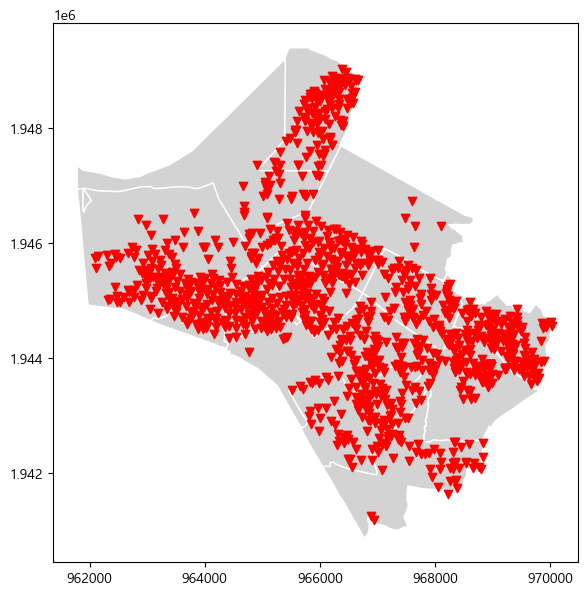

In [111]:
cctv_songpa=gpd.GeoDataFrame(cctv_songpa, geometry=gpd.points_from_xy(cctv_songpa['경도'], cctv_songpa['위도']))
cctv_songpa.crs = {'init':'epsg:4326'}
cctv_songpa = cctv_songpa.to_crs(epsg=5179)


ax = seoul_songpa.plot(color='lightgrey',edgecolor='white',figsize=(7,7))
cctv_songpa.plot(ax=ax, marker='v',color='red')

In [94]:
cctv_songpa.to_csv('./data/cctv_송파.csv',index=False)

# 치안센터

In [3]:
center = pd.read_excel('./data/치안센터_위치.xlsx')
center_songpa = center.query('경찰서=="서울송파"')
center_songpa

,Unnamed: 0,연번,시도청,경찰서,관서명,지역파출소,치안센터명,주소,Latitude,Longitude
133,133,134,서울청,서울송파,방이,지구대,송파1치안센터,서울 송파구 백제고분로 392,37.506242,127.109315
134,134,135,서울청,서울송파,잠실,지구대,잠실본동치안센터,서울 송파구 백제고분로 15길 5,37.505984,127.084598
135,135,136,서울청,서울송파,잠실,지구대,잠실5치안센터,서울 송파구 잠실로 51-29,37.513236,127.094223
136,136,137,서울청,서울송파,삼전,지구대,석촌치안센터,서울 송파구 백제고분로 37길 20,37.503598,127.103875
137,137,138,서울청,서울송파,가락,지구대,가락2치안센터,서울 송파구 오금로 46길 55,37.493182,127.132353
138,138,139,서울청,서울송파,문정,지구대,문정2치안센터,서울 송파구 중대로 18,37.489910,127.111091
139,139,140,서울청,서울송파,마천,파출소,마천1치안센터,서울 송파구 성내천로 43가길 14-1,37.496430,127.154976
140,140,141,서울청,서울송파,풍납,파출소,풍납1치안센터,서울 송파구 풍성로 25길 17,37.535046,127.120445
141,141,142,서울청,서울송파,신천,파출소,월드치안센터,서울 송파구 송파대로 567 지하1층,37.513265,127.101133
142,142,143,서울청,서울송파,위례,파출소,장지치안센터,서울 송파구 성남대로 1576,37.470510,127.127022


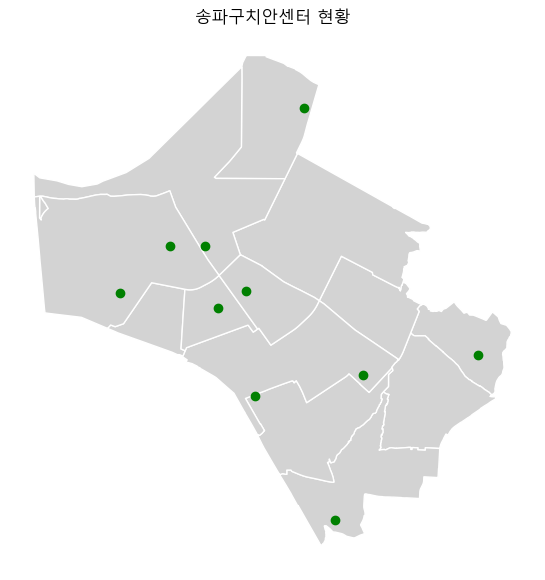

In [112]:
center_songpa=gpd.GeoDataFrame(center_songpa,geometry=gpd.points_from_xy(center_songpa['Longitude'], center_songpa['Latitude']))

center_songpa.crs = {'init':'epsg:4326'}
center_songpa = center_songpa.to_crs(epsg=5179)

ax = seoul_songpa.plot(color='lightgrey',edgecolor='white',figsize=(7,7))
center_songpa.plot(ax=ax, marker='o',color='green')
plt.title('송파구치안센터 현황')
plt.axis('off')
plt.show()

In [96]:
center_songpa.to_csv('./data/center_송파.csv',index=False)

# 유흥주점

In [116]:
bar = pd.read_excel('./data/유흥주점.xlsx',usecols = [7,15])
bar['행정구역'] = bar['지번주소'].str.split(' ').str[1]

bar_songpa = bar.query('상세영업상태명 == "영업" and 행정구역 == "송파구"')
bar_songpa.reset_index(drop = True, inplace=True)

In [117]:
bar_songpa['경도'] = ''
bar_songpa['위도'] = ''

In [118]:
import requests

for i in range(len(bar_songpa)):
    url= "http://api.vworld.kr/req/address?"
    key = 'F2FA331D-A1EB-337A-ACF7-A42DBF7AA247'
    address = bar_songpa['지번주소'][i]
    params ={'service' : 'address', 
            'request' : 'getcoord','version' : '2.0',
            'refine' : 'true', 'simple' : 'false', 'type' : 'PARCEL',
            'crs' : 'epsg:5179', 'format' : 'json',
            'address': address,
            'key' : key}
    res = requests.get(url, params = params)
    json_data = res.json()

    if json_data['response']['status'] == 'OK':
        bar_songpa['경도'][i] = json_data['response']['result']['point']['x']
        bar_songpa['위도'][i] = json_data['response']['result']['point']['y']

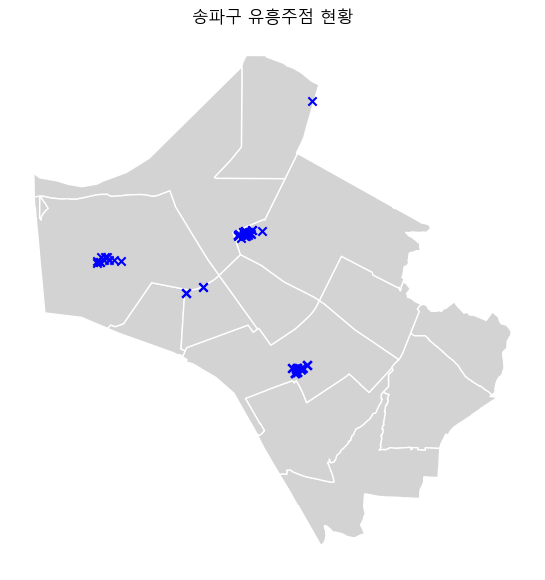

In [113]:
bar_songpa=gpd.GeoDataFrame(bar_songpa,geometry=gpd.points_from_xy(bar_songpa['경도'], bar_songpa['위도']))

ax = seoul_songpa.plot(color='lightgrey',edgecolor='white',figsize=(7,7))
bar_songpa.plot(ax=ax, marker='x',color='blue')
plt.title('송파구 유흥주점 현황')
plt.axis('off')
plt.show()

In [98]:
bar_songpa.to_csv('./data/bar_송파.csv',index=False)

# 병원

In [73]:
df_H = pd.read_csv('./data/병의원.csv',usecols = [1,3,31,32])
df_H

,주소,병원분류명,병원경도,병원위도
0,서울특별시 강남구 봉은사로 612 (삼성동),한방병원,127.062148,37.514280
1,서울특별시 강서구 양천로 424 가양역 데시앙플렉스 지식산업센터 2층 236~240...,의원,126.847971,37.564228
2,서울특별시 강남구 선릉로 660 (삼성동 브라운스톤레전드 304호),치과의원,127.042331,37.515550
3,서울특별시 서초구 강남대로 355 삼성화재 서초사옥 181920층 (서초동),의원,127.028831,37.494366
4,서울특별시 강남구 테헤란로 139-1 2층 지하1층 (역삼동),의원,127.034470,37.500441
...,...,...,...,...
19052,서울특별시 강서구 곰달래로 223 (화곡동),의원,126.857784,37.531841
19053,서울특별시 용산구 한강대로 109 (한강로2가 용성비즈텔),한의원,126.968173,37.529991
19054,서울특별시 강남구 봉은사로 213 센트럴타워 5~8층 (논현동),한방병원,127.035365,37.508049
19055,서울특별시 강서구 강서로 173 터보빌딩 789층 (화곡동),한방병원,126.839622,37.541924


In [55]:
df_H['병원분류명'].value_counts()

의원         9721
치과의원       4973
한의원        3726
병원          239
요양병원        136
한방병원         86
치과병원         63
종합병원         57
보건소          38
기타           17
기타(구급차)       1
Name: 병원분류명, dtype: int64

In [74]:
df_H = df_H.query("병원분류명 in ['의원','병원','종합병원']")

df_H['행정구역'] = df_H['주소'].str.split(' ').str[1]
H_songpa = df_H.query('행정구역 == "송파구"')

H_songpa.reset_index(drop=True, inplace=True)
H_songpa

,주소,병원분류명,병원경도,병원위도,행정구역
0,서울특별시 송파구 백제고분로 407 (송파동 지하 2층~7층),병원,127.109884,37.507592,송파구
1,서울특별시 송파구 백제고분로 457 (방이동),의원,127.112678,37.511488,송파구
2,서울특별시 송파구 거마로 61 401호 (마천동 한스어반타워),의원,127.146416,37.498474,송파구
3,서울특별시 송파구 마천로 295-1 메디파크빌딩 23층 (마천동),의원,127.149198,37.496279,송파구
4,서울특별시 송파구 충민로2길 24 (장지동 리더스플라자 401호),의원,127.127279,37.477621,송파구
...,...,...,...,...,...
641,서울특별시 송파구 석촌호수로 160 (삼전동 4층),의원,127.094804,37.506667,송파구
642,서울특별시 송파구 송파대로 345 1A동 5층 5007호일부5008호 (가락동 헬리...,의원,127.111845,37.499351,송파구
643,서울특별시 송파구 가락로 244 201호 (방이동 동원빌딩),의원,127.118192,37.509852,송파구
644,서울특별시 송파구 백제고분로 212 2층 (삼전동 아미빌딩),의원,127.090088,37.503492,송파구


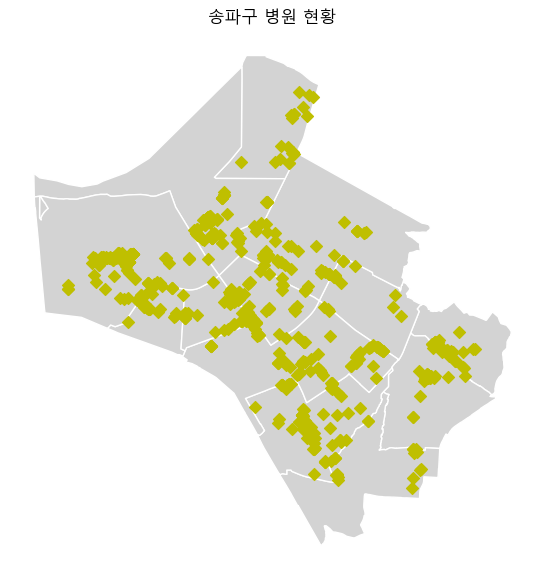

In [115]:
H_songpa=gpd.GeoDataFrame(H_songpa,geometry=gpd.points_from_xy(H_songpa['병원경도'], H_songpa['병원위도']))

H_songpa.crs = {'init':'epsg:4326'}
H_songpa = H_songpa.to_crs(epsg=5179)

ax = seoul_songpa.plot(color='lightgray',edgecolor='white',figsize=(7,7))
H_songpa.plot(ax=ax, marker='D',color='y')
plt.title('송파구 병원 현황')
plt.axis('off')
plt.show()

In [97]:
H_songpa.to_csv('./data/H_송파.csv',index=False)

# 돌봄센터

In [76]:
df_care1 = pd.read_csv('./data/열린육아방.csv', usecols = [1,5,7,8,9])
df_care2 = pd.read_csv('./data/우리동네키움센터.csv', usecols = [1,5,7,8,9])
df_care3 = pd.read_csv('./data/지역아동센터.csv',usecols = [1,5,7,8,9])

df_care = pd.concat([df_care1,df_care2,df_care3])

In [77]:
care_songpa = df_care.query('자치구명=="송파구"')
care_songpa.reset_index(drop=True, inplace=True)

In [78]:
care_songpa

,시설명,자치구명,연령구분,X좌표값,Y좌표값
0,송파동 공동육아방,송파구,영유아,127.113050,37.508590
1,송파여성문화회관공동육아방,송파구,영유아,127.109740,37.505980
2,위례 열린육아방,송파구,영유아,127.134834,37.476163
3,송파18호점 우리동네키움센터(위례동2호점 송파키움센터),송파구,초등학생,127.151090,37.488200
4,송파17호점 우리동네키움센터(거여2동 송파키움센터),송파구,초등학생,127.150570,37.493210
5,송파16호점 우리동네키움센터(문정1동 송파키움센터),송파구,초등학생,127.127880,37.490140
6,송파15호점(융합형) 우리동네키움센터(잠실본동2호점 송파키움센터),송파구,초등학생,127.082680,37.506120
7,송파14호점 우리동네키움센터(장지동 송파키움센터),송파구,초등학생,127.126720,37.481980
8,송파13호점 우리동네키움센터(송파2동 송파키움센터),송파구,초등학생,127.115580,37.501960
9,송파12호점 우리동네키움센터(방이1동 송파키움센터),송파구,초등학생,127.119520,37.511950


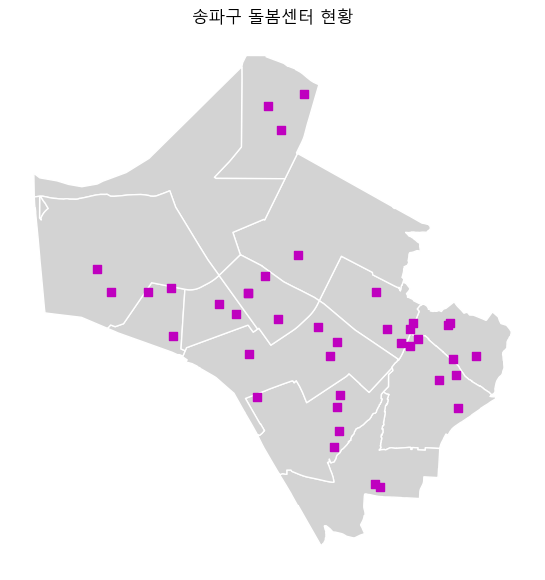

In [79]:
care_songpa=gpd.GeoDataFrame(care_songpa,geometry=gpd.points_from_xy(care_songpa['X좌표값'], care_songpa['Y좌표값']))

care_songpa.crs = {'init':'epsg:4326'}
care_songpa = care_songpa.to_crs(epsg=5179)

ax = seoul_songpa.plot(color='lightgray',edgecolor='white',figsize=(7,7))
care_songpa.plot(ax=ax, marker='s',color='m')
plt.title('송파구 돌봄센터 현황')
plt.axis('off')
plt.show()

In [99]:
care_songpa.to_csv('./data/care_송파.csv',index=False)